# CME538 - Introduction to Data Science
## Assignment 4 - Exploratory Data Analysis

**Learning Objectives**
After completing this assignment, you should be comfortable:

- Using `matplotlib` and `seaborn` for data visualization.
- Using more advanced `Pandas` grouping and aggregating methods.
- Resampling DateTime indices.
- Working with datetime columns in `Pandas`.
- Removing outliers.
- Investigating missing data.

You are free to add new cells to use as a scratch pad, but make sure to clean you code up and present your answer in the cell indicated with `# Write your code here`.

**Marking Breakdown**

Question | Points
--- | ---
Question 1a | 1
Question 1b | 1
Question 1c | 1
Question 1d | 1
Question 1e | 1
Question 2a | 1
Question 2b | 1
Question 2c | 1
Question 3a | 1
Question 3b | 1
Question 4a | 1
Question 4b | 1
Question 4c | 1
Question 5 | 1
Question 6 | 1
Question 7a | 1
Question 7b | 1
Question 7c | 1
Question 7d | 1
Question 7e | 1
Question 7f | 1
Question 7g | 1
Question 8a | 1
Question 8b | 1
Question 8c | 1
Question 8d | 1
Question 8e | 1
Total | 27

One of the following marks below will be added to the **Total** above.

### Code Quality

| Rank | Points | Description |
| :-- | :-- | :-- |
| Youngling | 1 | Code is unorganized, variables names are not descriptive, redundant, memory-intensive, computationally-intensive, uncommented, error-prone, difficult to understand. |
| Padawan | 2 | Code is organized, variables names are descriptive, satisfactory utilization of memory and computational resources, satisfactory commenting, readable. |
| Jedi | 3 | Code is organized, easy to understand, efficient, clean, a pleasure to read. #cleancode |

## Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Overview
You've just been hired by the City of Toronto. Congratulation! Toronto has been collecting data on its bike share program since 2017 and the 2019 data has just become available. The city has implemented some new initiatives to try to increase ridership numbers such as **Free Ride Wednesdays** in the month of September and the addition of new bike lanes. You manager has asked you to:
1. Merge the bike share data with local weather data from the TORONTO CITY CENTRE weather station.
2. Investigate the effect of temperature on ridership numbers.   
3. Explore different consumer behaviours between Annual Members and Casual Memebers.


# 1. Prepare Weather Data
## Question 1a
First, let's check to see what weather files are available in the assignment directory. Weather file names have the following structure `en_climate_hourly_ON_6158355_01-2017_P1H.csv`. All weather file names contain the number `6158359`, which is the `TORONTO CITY CENTRE` weather station ID. Create a variable called `weather_filenames` and assign a list containing all weather file names to it. 

In [2]:
# Write your code here.

weather_filenames = [word for word in os.listdir() if 'en_climate_hourly' in word]

# Print file names
print(weather_filenames[0:5])

['en_climate_hourly_ON_6158359_07-2019_P1H.csv', 'en_climate_hourly_ON_6158359_12-2019_P1H.csv', 'en_climate_hourly_ON_6158359_01-2019_P1H.csv', 'en_climate_hourly_ON_6158359_06-2019_P1H.csv', 'en_climate_hourly_ON_6158359_11-2019_P1H.csv']


## Question 1b
`weather_filenames` contains 12 files containing monthly weather data for 2019. Create a variable `weather_data` and assign a DataFrame to it that contains the data from all 12 `.csv` files. Hint: `pd.concat()` might be helpful.

Check out this [glossary](https://climate.weather.gc.ca/glossary_e.html#windChill) to get a better understanding of that the column names refer to.

In [28]:
# Write your code here.

frames = []

for i in range(len(weather_filenames)):
    data = pd.read_csv(weather_filenames[i])
    frames.append(data)
    
weather_data = pd.concat(frames)

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 00:00,2019,7,1,00:00,19.5,...,NaN,16.1,NaN,100.69,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 01:00,2019,7,1,01:00,18.8,...,NaN,16.1,NaN,100.70,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 02:00,2019,7,1,02:00,18.3,...,NaN,16.1,NaN,100.65,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 03:00,2019,7,1,03:00,15.7,...,NaN,16.1,NaN,100.62,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 04:00,2019,7,1,04:00,14.9,...,NaN,16.1,NaN,100.61,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1c
A column called `'Date/Time'` contains hourly datetime stamps in the format `YYYY-MM-DD HH:MM`. Use `pd.DatetimeIndex()` to set the `'Date/Time'` column as the index of `weather_data`. Now the index of `weather_data` is composed of `Timestamps`. Hint: 'weather_data.columns' should no longer contain `'Date/Time'`. 

In [29]:
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time']).dt.tz_localize('EST')
weather_data.set_index(pd.DatetimeIndex(weather_data['Date/Time']), drop=True, inplace=True)
weather_data = weather_data.drop(columns = ['Date/Time'])

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,00:00,19.5,NaN,...,NaN,16.1,NaN,100.69,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,01:00,18.8,NaN,...,NaN,16.1,NaN,100.70,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,02:00,18.3,NaN,...,NaN,16.1,NaN,100.65,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,03:00,15.7,NaN,...,NaN,16.1,NaN,100.62,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,04:00,14.9,NaN,...,NaN,16.1,NaN,100.61,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1d
The index of `weather_data` (`weather_data.index`) should be a series of Timestamps (e.g. `Timestamp('2019-01-01 00:00:00')`).

Are these Timestamps localized to a time zone? If so, which one?

*Type your answer here, replacing this text.*

If the Timestamps are not localized, localize them to Toronto's time zone (Eastern Standard Time - `EST`).

In [31]:
#already done in 1c
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,00:00,19.5,NaN,...,NaN,16.1,NaN,100.69,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,01:00,18.8,NaN,...,NaN,16.1,NaN,100.70,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,02:00,18.3,NaN,...,NaN,16.1,NaN,100.65,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,03:00,15.7,NaN,...,NaN,16.1,NaN,100.62,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,04:00,14.9,NaN,...,NaN,16.1,NaN,100.61,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1e
Next, plot temperature as a function of the datetime index. Your plot should look something like this.

<br>
<img src="images/temp_2019.png" alt="drawing" width="600"/>
<br>

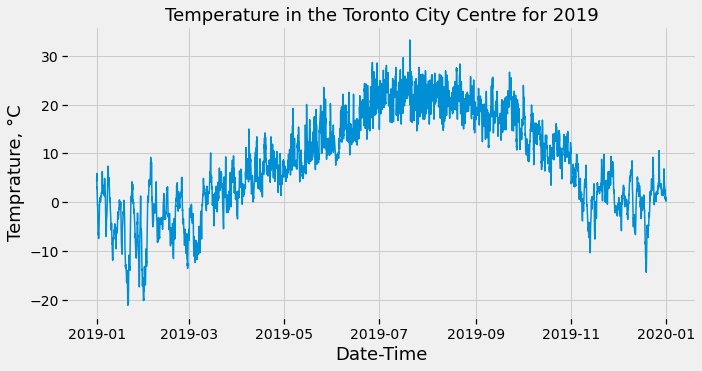

In [7]:
# Write your code here.
plt.figure(figsize=(10, 5))
plt.title('Temperature in the Toronto City Centre for 2019', fontsize=18)
ax = sns.lineplot(data=weather_data, x=weather_data.index, y='Temp (°C)')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Temprature, °C', fontsize=18)
plt.show()

# 2. Import Bike Share Data
The assignment folder contains data about bike share trips in the city of Toronto for 2019 where there is one `.csv` file for each month. File names have the structure `bike_share_YYYY-MM.csv`. 

In [8]:
# Get bike share file names
trips_filenames = [filename for filename in os.listdir() if 'bike_share' in filename]

# Print file names
print(trips_filenames)

['bike_share_2019-1.csv', 'bike_share_2019-2.csv', 'bike_share_2019-3.csv', 'bike_share_2019-7.csv', 'bike_share_2019-6.csv', 'bike_share_2019-4.csv', 'bike_share_2019-5.csv', 'bike_share_2019-12.csv', 'bike_share_2019-10.csv', 'bike_share_2019-11.csv', 'bike_share_2019-8.csv', 'bike_share_2019-9.csv']


## Question 2a
Create a variable `trips_data` and assign a DataFrame to it that contains the bike share data from all 12 `.csv` files.

In [9]:
# Write your code here.
frames = []

for i in range(len(trips_filenames)):
    data = pd.read_csv(trips_filenames[i])
    frames.append(data)
    
trips_data = pd.concat(frames)



# Let's remove double spaces from the column names
trips_data.columns = [' '.join(col.split()) for col in trips_data.columns]              

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 2b
Next, convert columns `'Start Time'` and `'End Time'` to datetimes. Then, localize `'Start Time'` and `'End Time'` to Eastern Standard Time (EST). This might take a minute or two.    

In [10]:
# Write your code here
trips_data['Start Time'] = pd.to_datetime(trips_data['Start Time']).dt.tz_localize('EST')
trips_data['End Time'] = pd.to_datetime(trips_data['End Time']).dt.tz_localize('EST')

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 2c
To check that these datetime conversion were done correctly, generate a plot of daily ride counts. Your plot should look something like this. Hint: Check out `.resample()` and consider making a new variable.

<br>
<img src="images/trips_2019.png" alt="drawing" width="600"/>
<br> 

In [11]:
# Write your code here.
trips_data = trips_data.resample('M').count()

plt.figure(figsize=(10, 5))
plt.title('Temperature in the Toronto City Centre for 2019', fontsize=18)
ax = sns.lineplot(data=weather_data, x=weather_data.index, y='Temp (°C)')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Temprature', fontsize=18)
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

# 3. Clean Bike Share Data
## Question 3a - Missing Data
Large datasets are rarely completely full (no missing values) and its always a good ideas to evaluatate if there is missing data and for what fields. 

First, check for missing values in `weather_data`. Create a DataFrame named `weather_data_missing` where the index in the column names of `weather_data` and there is one column named `'count'` which contains the number of missing values for a particular column.

In [12]:
# Write your code here.
weather_data_missing = weather_data.isna().sum()

# View DataFrame
weather_data_missing

Longitude (x)             0
Latitude (y)              0
Station Name              0
Climate ID                0
Year                      0
Month                     0
Day                       0
Time                      0
Temp (°C)                95
Temp Flag              8681
Dew Point Temp (°C)     145
Dew Point Temp Flag    8631
Rel Hum (%)             145
Rel Hum Flag           8631
Wind Dir (10s deg)      595
Wind Dir Flag          8450
Wind Spd (km/h)          23
Wind Spd Flag          8753
Visibility (km)          24
Visibility Flag        8752
Stn Press (kPa)          97
Stn Press Flag         8679
Hmdx                   7608
Hmdx Flag              8760
Wind Chill             6936
Wind Chill Flag        8760
Weather                7213
dtype: int64

Next, check for missing values in `trips_data`. Create a DataFrame named `trips_data_missing` where the index in the column names of `trips_data` and there is one column named `'count'` which contains the number of missing values for a particular column.

In [13]:
# Write your code here.
trips_data_missing = trips_data.isna().sum()

# View DataFrame
trips_data_missing

Trip Id                 0
Subscription Id         0
Trip Duration           0
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        454
End Time                0
End Station Name      454
Bike Id                 0
User Type               0
dtype: int64

We can see that some columns have missing values. However, having missing data does not necessarily mean that something is wrong with an entry. For example, the `Weather` column contains the following unique values:

In [14]:
weather_data['Weather'].unique().tolist()

[nan,
 'Rain',
 'Fog',
 'Thunderstorms',
 'Haze',
 'Rain,Fog',
 'Thunderstorms,Rain',
 'Thunderstorms,Heavy Rain,Fog',
 'Moderate Rain,Fog',
 'Thunderstorms,Moderate Rain',
 'Heavy Rain,Fog',
 'Freezing Rain,Fog',
 'Snow',
 'Freezing Rain',
 'Rain,Snow',
 'Moderate Rain',
 'Snow,Blowing Snow',
 'Heavy Snow',
 'Moderate Snow',
 'Haze,Blowing Snow',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms,Fog',
 'Thunderstorms,Heavy Rain']

You can see that only non-normal/clear weather events are listed. So, when `weather_data['Weather'] == NaN`, the conditions are clear. Therefore, we would never want to remove rows where `weather_data['Weather'] == NaN`.

We can see that the first 8 columns of `weather_data_missing` have no missing data, so we can leave `weather_data` and address the missingness on a case-by-case basis depending on which columns we're analyzing.

For `trips_data`, we can see that `'End Station Id'` and `'End Station Name'` have 454 missing values, which is only 0.01% of the dataset. This might suggest corruption and given the small number of missing values, we can safetly drop these rows. 

## Question 3b - Missing Data
Drop any rows of `trips_data` with missing values.

In [15]:
# Write your code here.
trips_data = trips_data.dropna(subset = ['End Station Id'])
trips_data = trips_data.dropna(subset = ['End Station Name'])

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 4a - Outliers
Outliers in your datasets can be both good and bad. One the one hand, they may contain important information while on the other hand, they skew your visualizations and may bias your models. 

As a simple first pass, let's look at the summary statistics for `trips_data` using `.describe()` (remember, it only works for numeric data).

In [16]:
trips_data.describe()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,End Station Id,Bike Id
count,2.439063e+06,2.439063e+06,2.439063e+06,2.439063e+06,2.439063e+06,2.439063e+06
mean,5.957049e+06,3.529029e+05,1.044105e+03,7.183801e+03,7.183547e+03,2.718808e+03
std,7.885706e+05,8.000075e+04,1.853783e+04,1.355055e+02,1.354044e+02,1.388448e+03
min,4.581278e+06,6.537700e+04,0.000000e+00,7.000000e+03,7.000000e+03,1.400000e+01
25%,5.277110e+06,3.099960e+05,4.250000e+02,7.058000e+03,7.058000e+03,1.614000e+03
50%,5.956799e+06,3.394030e+05,6.880000e+02,7.171000e+03,7.171000e+03,2.909000e+03
75%,6.637216e+06,4.073290e+05,1.081000e+03,7.282000e+03,7.282000e+03,3.801000e+03
max,7.334127e+06,5.239440e+05,1.240378e+07,7.511000e+03,7.511000e+03,5.038000e+03


Right away we notice something a bit funny with `'Trip Duration'`. The min and max values seem implausible. A trip cannot last `0 seconds` (you'd have to be biking at the speed of light!) and its unlikely that a trip lasted for `1.240378e+07 seconds`. `1.240378e+07 seconds` is roughly 4.78 months, which would be quite the ride and cost tens of thousands of dollars. We can see that the average `'Trip Duration'` is roughly 17 minutes.

We've been told by Bike Share Toronto that trips lasting less than 1 minute can be considered false trips. Remove all trips from `trips_data` with a duration less than 60 seconds.

In [17]:
# Write your code here
trips_data = trips_data.drop(trips_data[(trips_data['Trip Duration'] < 60)].index)

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
5,4581283,295565,624,7041,2019-01-01 00:26:00-05:00,Edward St / Yonge St,7031.0,2019-01-01 00:36:00-05:00,Jarvis St / Isabella St,661,Annual Member
6,4581284,295563,604,7041,2019-01-01 00:26:00-05:00,Edward St / Yonge St,7031.0,2019-01-01 00:36:00-05:00,Jarvis St / Isabella St,2120,Annual Member


## Question 4b - Outliers
Next, remove any `'Trip Duration'` values less than `Q1 - 1.5 * IQR` and greater than `Q3 + 1.5 * IQR`. 

- Q1: The first quartile (`.quantile(0.25)`)
- Q3: The third quartile (`.quantile(0.75)`)
- IQR: The first quartil (`Q3 - Q1`)
<br>
<img src="images/probability_density.png" alt="drawing" width="450"/>
<br> 

In [18]:
# Write your code here
col = ['Trip Duration'] 
Q1 = trips_data[col].quantile(0.25)
Q3 = trips_data[col].quantile(0.75)
IQR = Q3 - Q1
trips_data = trips_data[~((trips_data[col] < (Q1 - 1.5 * IQR)) |(trips_data[col] > (Q3 + 1.5 * IQR))).any(axis=1)]


# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
5,4581283,295565,624,7041,2019-01-01 00:26:00-05:00,Edward St / Yonge St,7031.0,2019-01-01 00:36:00-05:00,Jarvis St / Isabella St,661,Annual Member
6,4581284,295563,604,7041,2019-01-01 00:26:00-05:00,Edward St / Yonge St,7031.0,2019-01-01 00:36:00-05:00,Jarvis St / Isabella St,2120,Annual Member


## Question 4c - Outliers
Plot a histogram + density plot using `sns.distplot()` of the `'Trip Duration'`. Ensure that `'Trip Duration'` is displayed in minutes. Your plot should look something like this.
<br>
<img src="images/trip_durations.png" alt="drawing" width="450"/>
<br> 

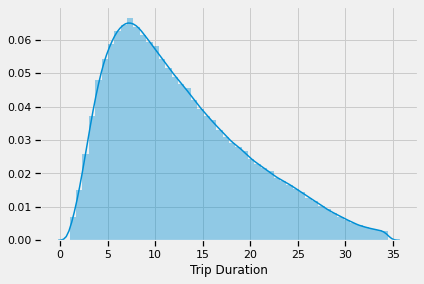

In [19]:
# Write your code here.
sns.distplot(trips_data['Trip Duration'].div(60))
plt.show()

## Question 5 - Duplicates
Remove any entries from `trips_data` which have the same `'Trip Id'`.

In [20]:
# Write your code here
trips_data = trips_data.drop_duplicates(subset = 'Trip Id')

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
5,4581283,295565,624,7041,2019-01-01 00:26:00-05:00,Edward St / Yonge St,7031.0,2019-01-01 00:36:00-05:00,Jarvis St / Isabella St,661,Annual Member
6,4581284,295563,604,7041,2019-01-01 00:26:00-05:00,Edward St / Yonge St,7031.0,2019-01-01 00:36:00-05:00,Jarvis St / Isabella St,2120,Annual Member


# 4. Merge Datasets
To facilitate an analysis of the effect of weather on ridership, we must merge two DataFrames (`weather_data` and `trips_data`).

## Question 6
Use the `.merge()` function to combine `weather_data` and `trips_data` using datetime information and set the output to a new variable called `data_merged`. In `trips_data` there are two time stamps corresponding to the start and end of the ride. Use the `'Start Time'` of the rides to merge. 

`trips_data` datetimes contain information down to the minute, while `weather_data` is reported every hour. Thus, we must merge based on a common year, month, day, hour. Hint: create a new column in `trips_data` called `'merge_time'` and set it equal to `trips_data['Start Time']` rounded to the nearest hour.

In [32]:
# Write your code here
trips_data['Start Time'] = pd.to_datetime(trips_data['Start Time'], errors='coerce')
trips_data['merge_time'] = trips_data['Start Time'].dt.round('H')
data_merged = trips_data.merge(right=weather_data, how='left', left_on = 'merge_time', right_index = True)

# View DataFrame
data_merged.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
5,4581283,295565,624,7041,2019-01-01 00:26:00-05:00,Edward St / Yonge St,7031.0,2019-01-01 00:36:00-05:00,Jarvis St / Isabella St,661,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
6,4581284,295563,604,7041,2019-01-01 00:26:00-05:00,Edward St / Yonge St,7031.0,2019-01-01 00:36:00-05:00,Jarvis St / Isabella St,2120,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"


In [51]:
data_merged.columns

Index(['Trip Id', 'Subscription Id', 'Trip Duration', 'Start Station Id',
       'Start Time', 'Start Station Name', 'End Station Id', 'End Time',
       'End Station Name', 'Bike Id', 'User Type', 'merge_time',
       'Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year',
       'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)',
       'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag',
       'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)',
       'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag',
       'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill',
       'Wind Chill Flag', 'Weather'],
      dtype='object')

# 5. Analysis of 'User Type'
## Question 7a
First, we'll explore the daily number for Annual Members and Casual Members. Casual Members pay on a per ride basis while Annual Members pay a monthly subcription fee. The DataFrame `data_merged` has a temporal resolution of a minute. Therefore, in order to look at daily numbers, we'll need to convert `data_merged` so that every row corresponds to a day. Create a new DataFrame called `data_days` with three columns:
- ride: The total number of rides for a particular day.
- annual_members: Number of rides by Annual Members.
- casual_members: Number of rides by Casual Members.
- workday: Was this day a workday (True) or a weekend day (False).

Your DataFrame should looks something like this.

<br>
<img src="images/data_days.png" alt="drawing" width="500"/>
<br>

As a quick sanity check you can check that the number of rows in `data_merged` is equal to the sum of `data_days['rides']`.

Hint: You can use the `.groupby()` method and the `agg()` method to compute this transformation in a single line of code.

In [33]:
# Write your code here
data_days = pd.DataFrame()
data_days = data_merged.groupby([pd.Grouper(key='Start Time', freq = 'D')]).agg(rides=('Trip Id','count'),
            annual_members=('User Type', lambda x: (x=='Annual Member').sum()),
            casual_members=('User Type', lambda x: (x=='Casual Member').sum()))

# View DataFrame

data_days.head()

,rides,annual_members,casual_members
Start Time,,,
2019-01-01 00:00:00-05:00,790,692,98
2019-01-02 00:00:00-05:00,1906,1845,61
2019-01-03 00:00:00-05:00,1936,1898,38
2019-01-04 00:00:00-05:00,2926,2799,127
2019-01-05 00:00:00-05:00,1830,1663,167


## Question 7b
Use `sns.distplot()` to create a plot showing the distributions of daily ride counts from `data_days` for Casual Members and Annual Members. Your plot should look something like this. 

<br>
<img src="images/ride_count_histogram.png" alt="drawing" width="600"/>
<br>

Text(0, 0.5, 'Probability Density')

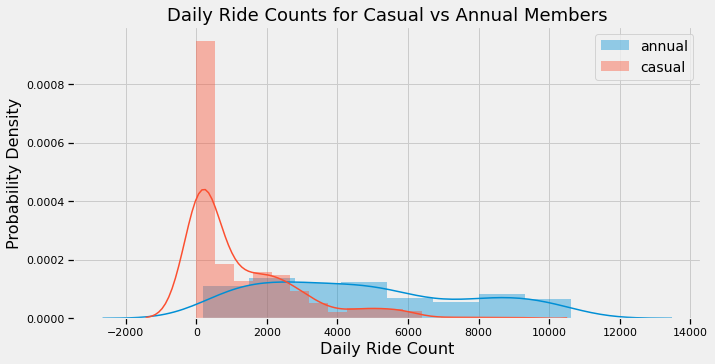

In [43]:
# Write your code here.
plt.figure(figsize=(10, 5))
plt.title('Daily Ride Counts for Casual vs Annual Members', fontsize=18)
grph = sns.distplot(data_days['annual_members'], label='annual')
sns.distplot(data_days['casual_members'], label='casual')

plt.legend(fontsize=14)
plt.xlabel('Daily Ride Count', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)

## Question 7c
Use `sns.scatterplot()` to create a scatter plot showing the relationship between daily ride counts from `data_days` for Casual Members and Annual Members. Your plot should look something like this. 

<br>
<img src="images/ride_count_scatter.png" alt="drawing" width="600"/>
<br>

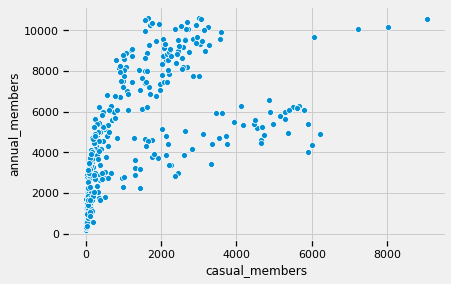

In [53]:
# Write your code here.
sct = sns.scatterplot(data = data_days, y = 'annual_members', x = 'casual_members' ,legend=False)
 


## Question 7d
Looking at the figure you've generated for **Question 7c**, some interesting outliers have appeared. In particular, there are some `workday` data points that appear to follow the `non-workday` trend. What could explain these outlier and what additional information could be collect to address them? 

*Some Annual pass holders use bikeshare service on weekends aswell, or it could be faulty data etc*

## Question 7e
Let's examine the hourly ride counts for `Annual Members` and `Casual Members`. First thing we have to do i create a new DataFrame called `data_hours`. `data_hours` should have its index set to hours (0 to 23) using the `'Start Time'` column and three columns `'rides', 'annual_members', 'casual_members'`. These should be average hourly values. 

In [54]:
#Start_Time_Update = data_merged(['Start Time']).dt.time
data_hours = data_merged.groupby(data_merged['Start Time'].dt.floor('H')).agg(rides=('Trip Id','count'),
            annual_members=('User Type', lambda x: (x=='Annual Member').mean()), 
            casual_members=('User Type', lambda x: (x=='Casual Member').mean()))
data_hours = data_hours.groupby(data_hours.index.hour).agg('mean')

# View DataFrame
data_hours.head(24)

,rides,annual_members,casual_members
Start Time,,,
0,61.021978,0.828625,0.171375
1,37.922438,0.814264,0.185736
2,27.361582,0.810856,0.189144
3,13.271429,0.811488,0.188512
4,10.293785,0.868197,0.131803
5,25.130919,0.932301,0.067699
6,75.579670,0.942469,0.057531
7,201.321429,0.935271,0.064729
8,531.709589,0.934850,0.065150


## Question 7f
Use `data_hours` to create a plot showing the average number of hourly rides for `Annual Members` and `Casual Memebers`. Your plot should look something like this.

<br>
<img src="images/hourly_rides.png" alt="drawing" width="600"/>
<br>

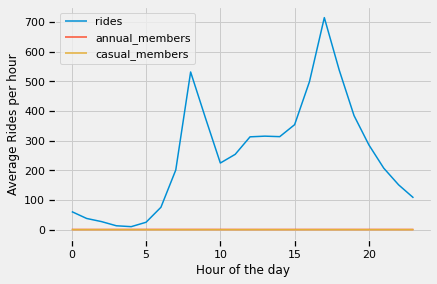

In [60]:
# Write your code here.
data_hours.plot.line()
plt.xlabel("Hour of the day")
plt.ylabel("Average Rides per hour")
plt.show()

## Question 7g
What can you observe from the plot? Hypothesize about the meaning of the peaks for casual and annual membership riders.

*Before Work and After Work Commute shows in the form of Spike for Annual which sugests that annula passholders use thier bikes for commuting purposes. Casual members use it in the evening which suggests its for leisure use.*

# 5. Analysis of 'Weather'
In this section, we'll be looking at the influence of weather conditions, such as temperature and precipitation, on ridership activity.

First, let's take a look at the missingness for `data_merged`. 

In [61]:
data_merged.isnull().sum(axis=0).to_frame('count')

,count
Trip Id,0
Subscription Id,0
Trip Duration,0
Start Station Id,0
Start Time,0
Start Station Name,0
End Station Id,0
End Time,0
End Station Name,0
Bike Id,0


We can see that the `'Weather'` column has 824,894 missing values. Now let's take a look at the unique labels in the `'Weather'` column and how many entries contain each one.

In [62]:
data_merged.groupby('Weather')['Trip Id'].count().sort_values(ascending=False)

Weather
Rain                               66749
Fog                                43513
Snow                               24557
Rain,Fog                           17301
Haze                                7049
Thunderstorms,Rain                  2651
Moderate Rain,Fog                   2571
Thunderstorms                       2401
Thunderstorms,Heavy Rain,Fog        2338
Moderate Rain                       1690
Rain,Snow                            773
Thunderstorms,Fog                    721
Thunderstorms,Moderate Rain          650
Thunderstorms,Heavy Rain             304
Moderate Snow                        196
Heavy Rain,Fog                       159
Snow,Blowing Snow                     92
Freezing Rain,Fog                     81
Haze,Blowing Snow                     79
Heavy Snow                            52
Thunderstorms,Moderate Rain,Fog       25
Freezing Rain                         23
Name: Trip Id, dtype: int64

We can see that the most common `'Weather'` labels are `'Rain'`, `'Fog'`, and `'Rain,Fog'`. There is no label for **clear** condition, which suggests that the 824,894 NaN values correspond to **clear** conditions.

## Question 8a
The first thing we have to do is transform `data_merged` to contain aggregated values for each hour. Remember, `data_merged`'s grannularity is at the ride level. Each row, corresponds to one ride with a temporal resolution of one minute. Therefore, there can be multiple entries for the same minute.

Create a new variable called `hourly_rides_and_weather` and assign a DataFrame to it containing the following information:
- Index: DatetimeIndex with a resolution of 1 hour (2019-01-01 10:00:00, 2019-01-01 11:00:00, 2019-01-01 12:00:00, 2019-01-01 13:00:00, etc.). Use `'Start Time'` to generate this index.
- Column 1 `'rides'`: How many rides were recorded during a particular hour.
- Column 2 `'annual_members'`: How many `'Annual Member'` rides were recorded during a particular hour.
- Column 3 `'casual_members'`: How many `'Casual Member'` rides were recorded during a particular hour.
- Column 4 `'workday'`: Does this hour correspond to a workday or a weekend day (True, False). 
- Column 5 `'temp'`: Reported temperature from the `'Temp (°C)'` column. 
- Column 6 `'weather'`: Reported weather conditions from the `'Weather'` column. 

<br>
<img src="images/hourly_rides_and_weather_1.png" alt="drawing" width="600"/>
<br>

Hints:
1. Use `.groupby()` and `.agg()`.
2. This is an example of how you can use `.agg()` to compute Column 1 `'rides'`: `.agg(rides=('rides', 'sum'))`.
3. Use `data_merged['Start Time'].dt.floor('H')` to groupby hour.

In [63]:
# Write your code here
hourly_rides_and_weather = data_merged.groupby([data_merged['Start Time'].dt.floor('H')]).agg(rides=('Trip Id','count'),annual_members=('User Type', lambda x: (x=='Annual Member').sum()), casual_members=('User Type', lambda x: (x=='Casual Member').sum()),temp = ('Temp (°C)', 'max'), weather = ('Weather', lambda x: x.unique()[0]))

# View DataFrame
hourly_rides_and_weather.head(10)

,rides,annual_members,casual_members,temp,weather
Start Time,,,,,
2019-01-01 00:00:00-05:00,12,12,0,5.1,"Rain,Fog"
2019-01-01 01:00:00-05:00,23,21,2,5.9,NaN
2019-01-01 02:00:00-05:00,17,15,2,5.9,"Rain,Fog"
2019-01-01 03:00:00-05:00,9,9,0,3.3,NaN
2019-01-01 04:00:00-05:00,4,4,0,3.2,NaN
2019-01-01 05:00:00-05:00,4,4,0,3.2,NaN
2019-01-01 06:00:00-05:00,7,6,1,2.7,NaN
2019-01-01 07:00:00-05:00,10,9,1,2.3,NaN
2019-01-01 08:00:00-05:00,16,16,0,1.9,NaN


## Question 8b
Next, let's transform `hourly_rides_and_weather` from hourly to daily sampling. As we saw for **Question 7g**, there are strong trends within each day, which could complicate our initial analysis. Therefore, by aggrigating by day-of-the-week, we'll remove some of this trend.

Modify `hourly_rides_and_weather` to include the following information:
- Index: DatetimeIndex with a resolution of 1 day (2019-01-01 00:00:00, 2019-01-02 00:00:00, 2019-01-03 00:00:00, 2019-01-04 00:00:00, etc.). Use `'Start Time'` to generate this index.
- Column 1 `'rides'`: How many rides were recorded during a particular day.
- Column 2 `'annual_members'`: How many `'Annual Member'` rides were recorded during a particular day.
- Column 3 `'casual_members'`: How many `'Casual Member'` rides were recorded during a particular day.
- Column 4 `'workday'`: Does this a workday or a weekend day (True, False). 
- Column 5 `'temp'`: The maximum temperature recorded for a particular day. 
- Column 6 `'weather'`: This column should contain one of two values (`'clear'` or `'Precipitation'`). `'Clear'` should be assigned to days where 50% or more of the hours of that day had no precipitation events (Rain, Fog, Snow, Rain, Fog, etc.). Remember, `hourly_rides_and_weather['weather']` contains an `NaN` value when there was no precipitation event. When more than 50% of the hours of a day had a precipitation event, assign `'Precipitation'`.  

<br>
<img src="images/hourly_rides_and_weather_2.png" alt="drawing" width="600"/>
<br>

In [64]:
# Write your code here
hourly_rides_and_weather = hourly_rides_and_weather.resample('D').sum()



# View DataFrame
hourly_rides_and_weather.head(10)

,rides,annual_members,casual_members,temp
Start Time,,,,
2019-01-01 00:00:00-05:00,790,692,98,-5.0
2019-01-02 00:00:00-05:00,1906,1845,61,-94.6
2019-01-03 00:00:00-05:00,1936,1898,38,18.8
2019-01-04 00:00:00-05:00,2926,2799,127,85.2
2019-01-05 00:00:00-05:00,1830,1663,167,62.8
2019-01-06 00:00:00-05:00,1489,1382,107,15.7
2019-01-07 00:00:00-05:00,2572,2522,50,-50.4
2019-01-08 00:00:00-05:00,3104,3046,58,127.3
2019-01-09 00:00:00-05:00,2975,2925,50,9.3


## Question 8c
Let's investigate the relationship between weather conditions and ridership numbers. Create a violin plot using `sns.violinplot()` that looks something like the figure below.

<br>
<img src="images/weather_daily_rides_1.png" alt="drawing" width="600"/>
<br>

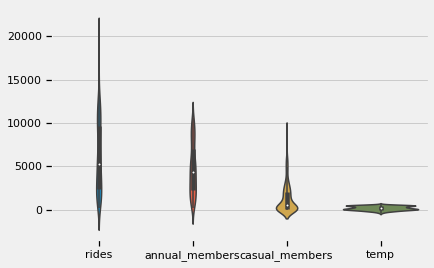

In [70]:
# Write your code here
sns.violinplot(data=hourly_rides_and_weather)


## Question 8d
Let's investigate the relationship between the maximum daily temperature and ridership numbers. Create a scatter plot using `sns.scatterplot()` that looks something like the figure below.

<br>
<img src="images/temp_daily_rides.png" alt="drawing" width="600"/>
<br>

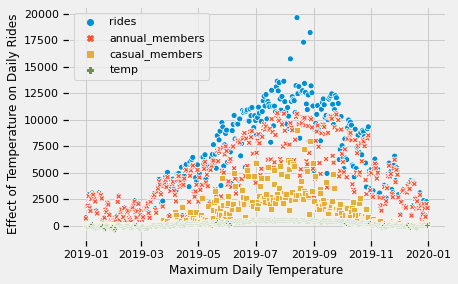

In [72]:
# Write your code here
sns.scatterplot(data = hourly_rides_and_weather)
plt.xlabel("Maximum Daily Temperature")
plt.ylabel("Effect of Temperature on Daily Rides")
plt.show()

## Question 8e
Reflect on the figures you've generated for **Question 8c** and **Question 8d**. What trends can you identify from these plots and can you suggest any potential issues with them or modifications you'd suggest to improve them?

*Clear and warmer days result in more bike usage, whereas colder and rainy days result in less use of bikes for both annual and Casual riders.*

**Congratulation, you're done Assignment 4. Review your answers and clean up that code before submitting on Quercus. `#cleancode`**